# Introduction

In this lab, we will use the Spectral Biclustering algorithm to cluster data by simultaneously considering both the rows (samples) and columns (features) of a matrix. It aims to identify patterns not only between samples but also within subsets of samples, allowing for the detection of localized structure within the data. This makes spectral biclustering particularly well-suited for datasets where the order or arrangement of features is fixed, such as in images, time series, or genomes. We will use the scikit-learn library to generate checkerboard dataset and bicluster it using the Spectral Biclustering algorithm.

# Generate sample data

We generate the sample data using the **make_checkerboard** function. Each pixel within **shape=(300, 300)** represents with it's color a value from a uniform distribution. The noise is added from a normal distribution, where the value chosen for **noise** is the standard deviation.

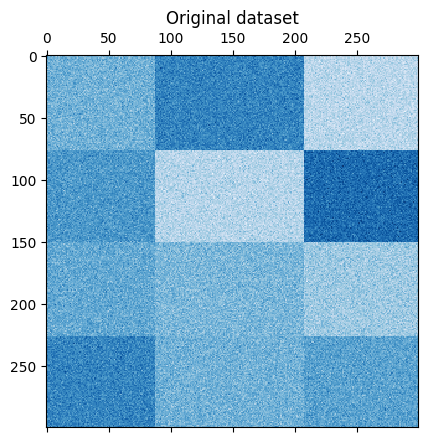

In [1]:
from sklearn.datasets import make_checkerboard
from matplotlib import pyplot as plt

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title('Original dataset')
_ = plt.show()


# Shuffle the data

We shuffle the data and the goal is to reconstruct it afterwards using **SpectralBiclustering**.

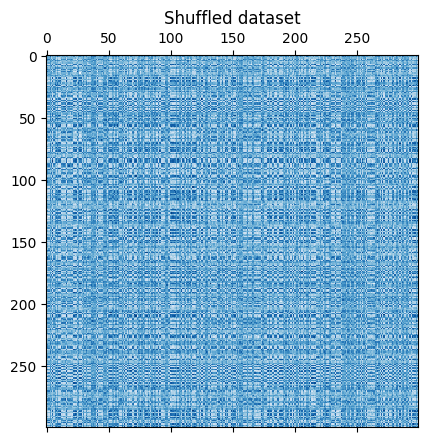

In [2]:
import numpy as np

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(42)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

# Redefing the shuffled data and plot it.
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title('Shuffled dataset')
_ = plt.show()

# Fit **SpectralBiclustering**

We fit the model and compare the obtained clusters with the ground truth. Note that when creating the model we specify the same number of clusters that we used to create the dataset **(n_clusters = (4, 3))**, which will contribute to obtain a good result.

In [3]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


# Plotting results

Now, we rearrange the data based on the row and column labels assigned by the **SpectralBiclustering** model in ascending order and plot again. The **row_labels_** range from 0 to 3, while the **column_labels_** range from 0 to 2, representing a total of 4 clusters per row and 3 clusters per column.

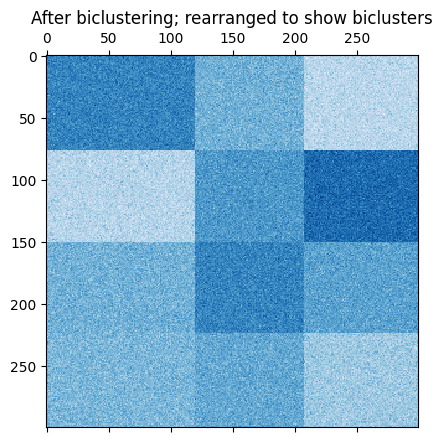

In [4]:
# Reordering first the rows and then the columns.
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
_ = plt.show()

As a last step, we want to demonstrate the relationships between the row and column labels assigned by the model. Therefore, we create a grid with **numpy.outer**, which takes the sorted **row_labels_** and **column_labels_** and adds 1 to each to ensure that the labels start from 1 instead of 0 for better visualization.

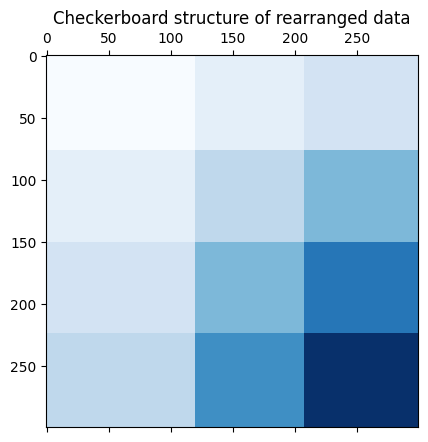

In [5]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()

# Summary

In this lab, we learned how to use the Spectral Biclustering algorithm to cluster data by simultaneously considering both the rows (samples) and columns (features) of a matrix. We generated a checkerboard dataset and bicluster it using the Spectral Biclustering algorithm. We also visualized the results to demonstrate the relationships between the row and column labels assigned by the model.